Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Veuillez fournir le chemin du fichier PDF à traiter : /content/CONDITIONS PARTICULIERES - 2024-08-20T154749.998 (1).pdf
Coordonnées des signatures détectées :
Signature 1: {'top_left': (437, 3072), 'bottom_right': (897, 3242), 'confidence': 0.8215442895889282}


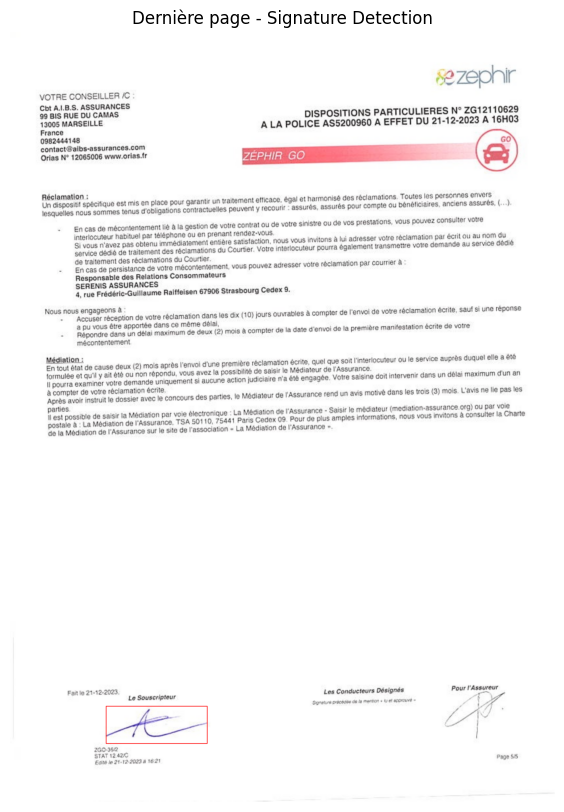

In [6]:
!pip install inference_sdk
!pip install pdf2image
!apt-get install poppler-utils
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient
from pdf2image import convert_from_bytes

def process_pdf(file_path):
    try:
        with open(file_path, 'rb') as f:
            pdf_data = f.read()
        pages = convert_from_bytes(pdf_data, dpi=300, fmt='png')
        last_page = pages[-1]
        image_path = "last_page.png"
        last_page.save(image_path, 'PNG')
        CLIENT = InferenceHTTPClient(
            api_url="https://detect.roboflow.com",
            api_key="X5Kkwgq6kpP5iPZKICbz"
        )
        result = CLIENT.infer(image_path, model_id="signature-detection-n7tzg-yq7dm/4")

        signature_coordinates = []
        img = cv2.imread(image_path)

        for prediction in result['predictions']:
            confidence = prediction.get('confidence', 0)
            width = int(prediction['width'])
            height = int(prediction['height'])
            aspect_ratio = width / height

            if confidence > 0.6 and 2.0 < aspect_ratio < 6.0 and 50 < height < 300:
                x = int(prediction['x'])
                y = int(prediction['y'])

                top_left = (x - width // 2, y - height // 2)
                bottom_right = (x + width // 2, y + height // 2)

                signature_coordinates.append({
                    "top_left": top_left,
                    "bottom_right": bottom_right,
                    "confidence": confidence
                })

                cv2.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

        print("Coordonnées des signatures détectées :")
        for idx, coords in enumerate(signature_coordinates):
            print(f"Signature {idx + 1}: {coords}")

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("Dernière page - Signature Detection")
        plt.show()

    except Exception as e:
        print(f"Erreur lors du traitement : {e}")

if __name__ == "__main__":
    pdf_path = input("Veuillez fournir le chemin du fichier PDF à traiter : ").strip()
    if pdf_path.endswith('.pdf'):
        process_pdf(pdf_path)
    else:
        print("Fichier invalide. Veuillez fournir un fichier PDF.")
